<a href="https://colab.research.google.com/github/gunturrs/asian-fisheries-trade-analysis-granite/blob/main/asian_fisheries_trade_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# Setup Project

!git clone https://github.com/gunturrs/asian-fisheries-trade-analysis-granite.git

%cd asian-fisheries-trade-analysis-granite

!ls data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

Cloning into 'asian-fisheries-trade-analysis-granite'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 206.06 KiB | 5.57 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite
Asia_Quantity.xls


In [126]:
# Load Dataset
df = pd.read_excel("data/Asia_Quantity.xls")

df.head()
df.info()
df.describe()

print("Dataset Column: ", df.columns.tolist())

# Cek jumlah missing values
print("Missing values per column:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Land Area   190 non-null    object
 1   Trade flow  190 non-null    object
 2   Commodity   190 non-null    object
 3   2000        190 non-null    int64 
 4   S_2000      65 non-null     object
 5   2001        190 non-null    int64 
 6   S_2001      54 non-null     object
 7   2002        190 non-null    int64 
 8   S_2002      53 non-null     object
 9   2003        190 non-null    int64 
 10  S_2003      49 non-null     object
 11  2004        190 non-null    int64 
 12  S_2004      49 non-null     object
 13  2005        190 non-null    int64 
 14  S_2005      49 non-null     object
 15  2006        190 non-null    int64 
 16  S_2006      46 non-null     object
 17  2007        190 non-null    int64 
 18  S_2007      48 non-null     object
 19  2008        190 non-null    int64 
 20  S_2008    

In [138]:
# Data Cleaning

# Hapus data di S_2000-S_2015
df = df.drop(columns=[c for c in df.columns.map(str) if c.startswith("S_")])

# Reshape Data
df_long = df.melt(
    id_vars = ["Land Area", "Trade flow", "Commodity"],
    var_name = "Year",
    value_name = "Quantity"
)

# Ubah Tipe Data
df_long["Year"] = df_long["Year"].astype(int)

# Check Perubahan dari Reshape Data
df_long.head(50)


,Land Area,Trade flow,Commodity,Year,Quantity
0,Afghanistan,Import,Fish,2000,0
1,Armenia,Export,Crustaceans,2000,20
2,Armenia,Export,Fish,2000,11
3,Armenia,Import,Crustaceans,2000,4
4,Armenia,Import,Fish,2000,799
5,Azerbaijan,Export,Fish,2000,1738
6,Azerbaijan,Import,Crustaceans,2000,1
7,Azerbaijan,Import,Fish,2000,2827
8,Bahrain,Export,Crustaceans,2000,3362
9,Bahrain,Export,Fish,2000,1342


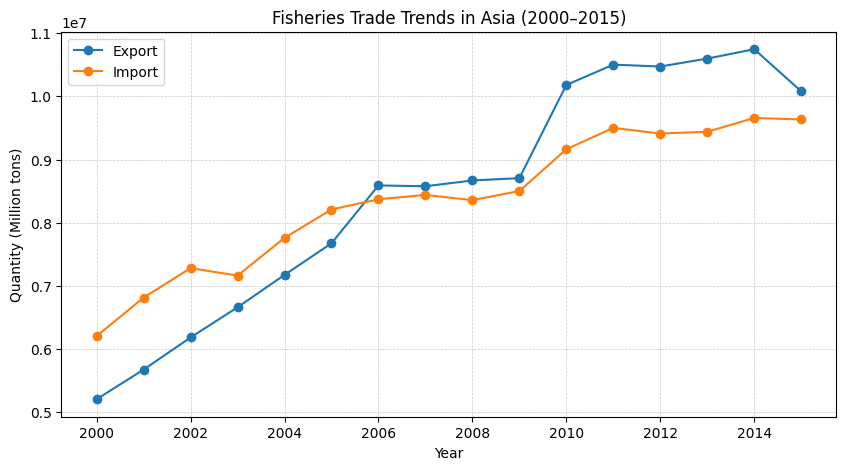

In [140]:
# Exploratory Data Analysis (EDA)

# 1. Fisheries Trade Trends in Asia (2000-2015)

trend = df_long.groupby(['Year','Trade flow'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10,5))
for flow in trend['Trade flow'].unique():
    subset = trend[trend['Trade flow']==flow]
    plt.plot(subset['Year'], subset['Quantity'], marker='o', label=flow)

plt.title("Fisheries Trade Trends in Asia (2000–2015)")
plt.xlabel("Year")
plt.ylabel("Quantity (Million tons)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


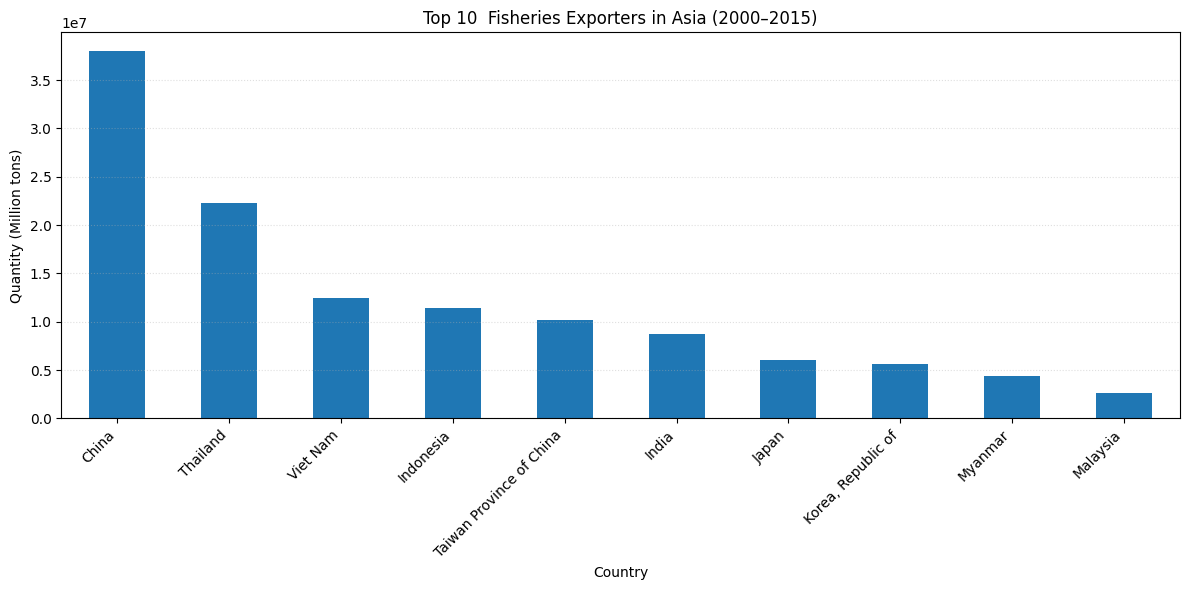

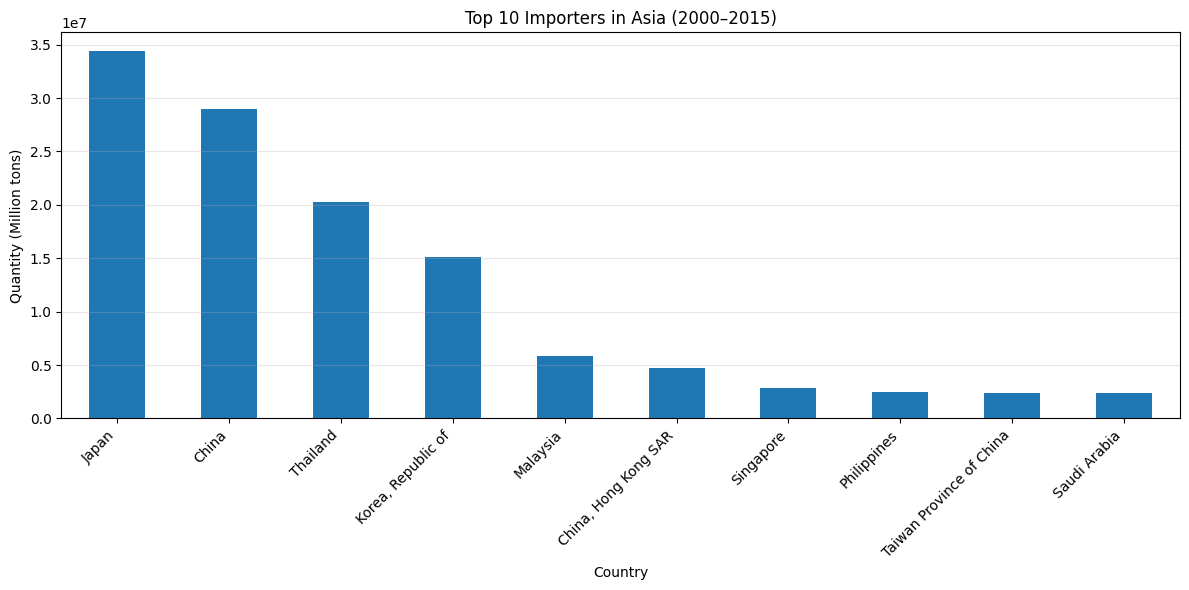

In [147]:
# 2. Top 10 Fisheries Exporters in Asia (2000-2015)

top_exporter = df_long[df_long['Trade flow']=='Export'] \
    .groupby('Land Area')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_exporter.plot(kind='bar', title="Top 10  Fisheries Exporters in Asia (2000–2015) ")
plt.xlabel("Country")
plt.ylabel("Quantity (Million tons)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top 10 Fisheries Importers in Asia (2000-2015)

top_importer = df_long[df_long['Trade flow']=='Import'] \
    .groupby('Land Area')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_importer.plot(kind='bar', title="Top 10 Fisheries Importers in Asia (2000–2015) ")
plt.xlabel("Country")
plt.ylabel("Quantity (Million tons)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


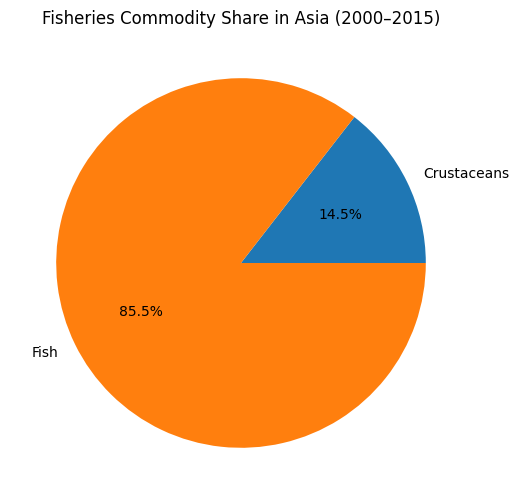

In [150]:
# 4. Fisheries Commodity Share in Asia (2000-2015)
commodity_share = df_long.groupby('Commodity')['Quantity'].sum()

threshold = commodity_share.sum() * 0.03  # 3% threshold
large_commodities = commodity_share[commodity_share >= threshold]
small_commodities = commodity_share[commodity_share < threshold]

if len(small_commodities) > 0:
    others_total = small_commodities.sum()
    large_commodities['Others'] = others_total

commodity_display = large_commodities

commodity_display.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title="Fisheries Commodity Share in Asia (2000–2015)"
)

plt.ylabel("")  # biar label Y hilang
plt.show()

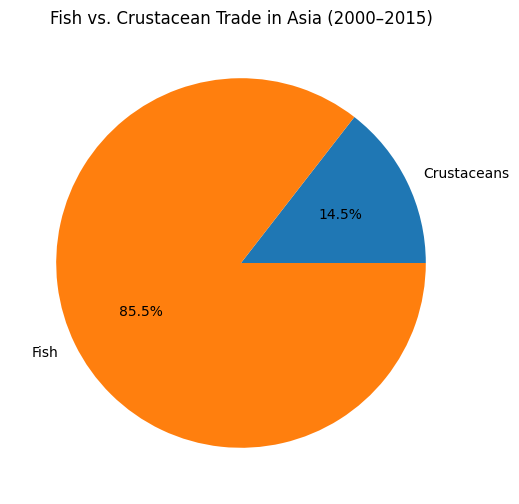

In [152]:
# 4. Fish vs. Crustacean Trade in Asia (2000-2015)
commodity_share = df_long.groupby('Commodity')['Quantity'].sum()

commodity_share.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title="Fish vs. Crustacean Trade in Asia (2000–2015)"
)

plt.ylabel("")  # biar label Y hilang
plt.show()

In [158]:
# Net Exporters and Importers in Asia over the years

net_trade = df_long.groupby(['Land Area','Trade flow'])['Quantity'].sum().unstack()
net_trade['Balance'] = net_trade['Export'] - net_trade['Import']

pd.options.display.float_format = '{:,.0f}'.format

# 5. Net Exporters
net_trade.sort_values('Balance', ascending=False).head(10)

Trade flow,Export,Import,Balance
Land Area,,,
Viet Nam,"12,484,716","1,727,369","10,757,347"
Indonesia,"11,479,900","1,589,613","9,890,287"
China,"38,044,558","28,966,907","9,077,651"
India,"8,734,113","210,387","8,523,726"
Taiwan Province of China,"10,231,341","2,377,442","7,853,899"
Myanmar,"4,373,785","62,577","4,311,208"
Thailand,"22,257,422","20,251,050","2,006,372"
Pakistan,"1,845,083","32,578","1,812,505"
Yemen,"1,155,418","149,573","1,005,845"


In [159]:
# 6. Net Exporters
net_trade.sort_values('Balance').head(10)

Trade flow,Export,Import,Balance
Land Area,,,
Japan,"6,058,198","34,427,366","-28,369,168"
"Korea, Republic of","5,604,598","15,143,313","-9,538,715"
"China, Hong Kong SAR","606,432","4,711,727","-4,105,295"
Malaysia,"2,606,431","5,848,314","-3,241,883"
Saudi Arabia,"295,444","2,368,735","-2,073,291"
Singapore,"937,196","2,847,903","-1,910,707"
United Arab Emirates,"237,868","1,779,590","-1,541,722"
Israel,"9,689","1,006,334","-996,645"
Sri Lanka,"286,345","1,275,577","-989,232"


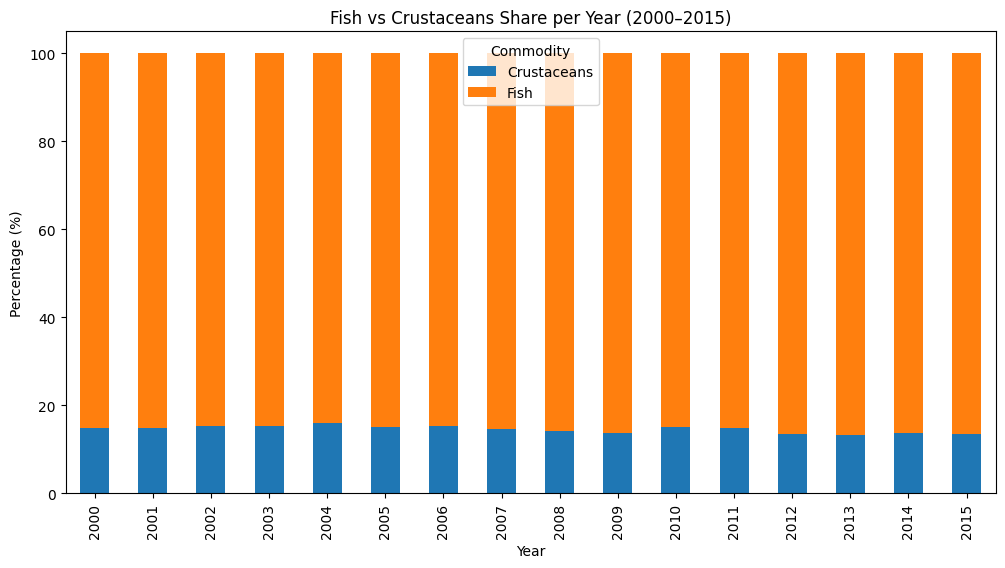

In [129]:
# Quantity Agrega
per_year_share = df_long.groupby(['Year','Commodity'])['Quantity'].sum().unstack()

# Ubah ke persentase (%)
per_year_share = per_year_share.div(per_year_share.sum(axis=1), axis=0) * 100

# Plot bar chart stacked
per_year_share.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title="Fish vs Crustaceans Share per Year (2000–2015)"
)

plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.legend(title="Commodity")
plt.show()